## Part I: test statistic distribution and a simple hypothesis test

We are going to use pseudo-experiments drawn from an Asimov dataset to build up a distribution of test statistic values, which will allow us to perform a simple hypothesis test to quantify the statistical agreement between one hypothesis and another.

In [1]:
%matplotlib inline

import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

os.environ['PISA_FTYPE'] = 'fp64'
os.environ['PISA_RESOURCES'] = '/afs/ifh.de/user/t/trettin/scratch/fridge3/analysis/common:/afs/ifh.de/user/t/trettin/scratch/fridge3/analysis/sandbox/atrettin/notebooks'
os.environ['PISA_TARGET'] = 'cpu'
from pisa import ureg, Q_
from pisa.core.binning import OneDimBinning, MultiDimBinning
from pisa.core.distribution_maker import DistributionMaker
from pisa.utils.config_parser import parse_pipeline_config
from pisa.utils.log import set_verbosity, logging

<< PISA_FTYPE env var is defined as: "fp64"; PISA_TARGET env var is defined as: "cpu"; PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
set_verbosity(2)

Here we **parse the pipeline configuration so we can manipulate it later on** without changing the source. For the `DistributionMaker` it doesn't make a difference whether the cfg is already parsed or not. Then we create the **Asimov dataset from the MC events** with their nominal weights.

In [3]:
# pipeline_cfg = parse_pipeline_config('./pipeline_upgrade_neutrinos_sterile_globes.cfg')
pipeline_cfg = parse_pipeline_config('pipeline_upgrade_neutrinos_sterile_globes.cfg')
dist_maker = DistributionMaker(pipeline_cfg)

[   DEBUG] Found "pipeline_upgrade_neutrinos_sterile_globes.cfg" at "pipeline_upgrade_neutrinos_sterile_globes.cfg"
[   DEBUG] Found "pipeline_upgrade_neutrinos_sterile_globes.cfg" at "pipeline_upgrade_neutrinos_sterile_globes.cfg"
[   DEBUG] Found "pipeline_upgrade_neutrinos_sterile_globes.cfg" at "pipeline_upgrade_neutrinos_sterile_globes.cfg"
[   DEBUG] Found "upgrade_binning.cfg" at "upgrade_binning.cfg"
[   DEBUG] Found path "" at /afs/ifh.de/user/t/trettin/scratch/fridge3/analysis/common/data/
[   DEBUG] Found resource "settings/osc/nufitv40.cfg" in PISA package at "/afs/ifh.de/group/amanda/scratch/trettin/pisa/pisa_examples/resources/settings/osc/nufitv40.cfg"
[   DEBUG] Found path "" at /afs/ifh.de/user/t/trettin/scratch/fridge3/analysis/common/data/
[   DEBUG] Found resource "settings/osc/earth.cfg" in PISA package at "/afs/ifh.de/group/amanda/scratch/trettin/pisa/pisa_examples/resources/settings/osc/earth.cfg"
[   DEBUG] Found path "" at /afs/ifh.de/user/t/trettin/scratch/fri

TypeError: 'odict_keys' object does not support indexing

## Plotting histograms

In [6]:
asimov_truth_split = dist_maker.get_outputs(return_sum=False)

[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.1749 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] Linking containers ['nue_cc', 'numu_cc', 'nutau_cc', 'nue_nc', 'numu_nc', 'nutau_nc', 'nuebar_cc', 'numubar_cc', 'nutaubar_cc', 'nuebar_nc', 'numubar_nc', 'nutaubar_nc'] into nu
[    INFO] Calculating nominal nue flux for nu
[    INFO] Calculating nominal numu flux for nu
[    INFO] Calculating nominal nuebar flux for nu
[    INFO] Calculating nominal numubar flux for nu
[   DEBUG] Unlinking all containers
[   DEBUG] module pisa.stages.flux.pi_honda_ip, function compute_function: 3282.5651 ms
[   DEBUG] Transforming nominal_nu_flux binned to array data
[   DEBUG] Transforming nominal_nubar_flux binned to array data
[   DEBUG] Transforming nominal_nu_flux binned to array data
[   DEBUG] Transforming nom

[   DEBUG]    281                                                       else:
[   DEBUG]    282                                                           raise Exception('unknown container name: %s' % container.name)
[   DEBUG]    283        12       5391.0    449.2      0.1              container['prob_e'].mark_changed(WHERE)
[   DEBUG]    284        12       5110.0    425.8      0.1              container['prob_mu'].mark_changed(WHERE)
[   DEBUG]    285        12       5058.0    421.5      0.1              container['prob_nonsterile'].mark_changed(WHERE)
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data


[ WARNING] /cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



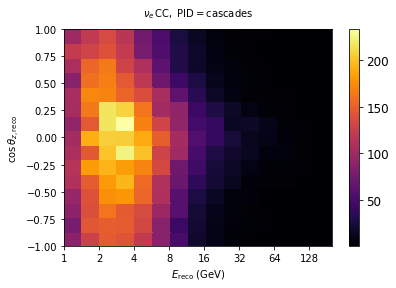

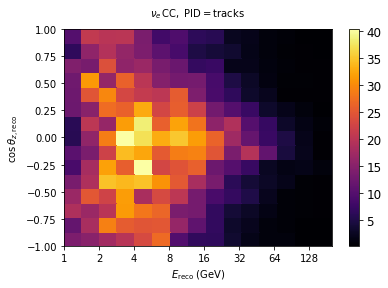

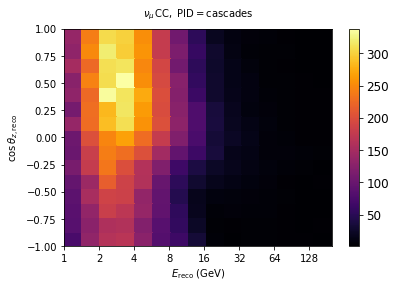

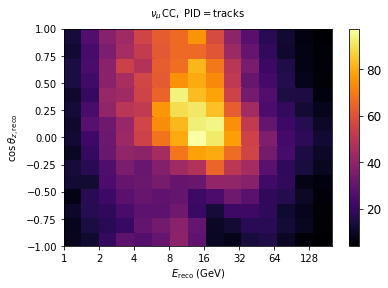

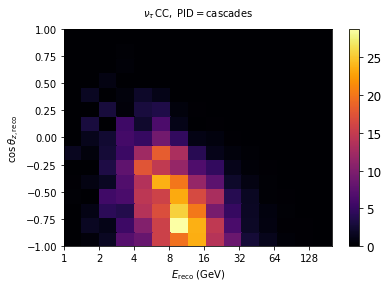

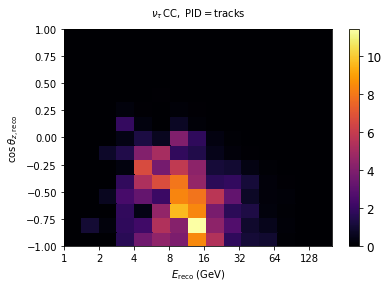

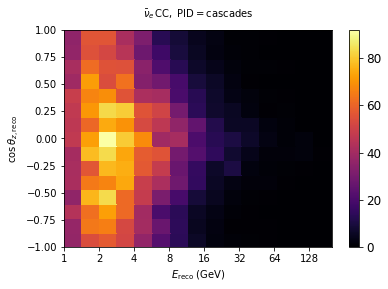

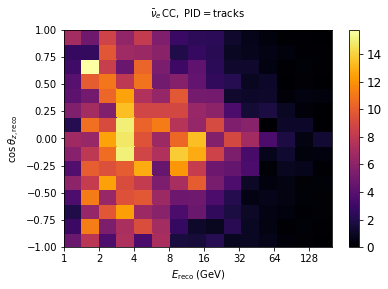

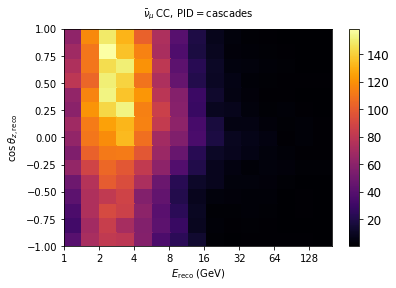

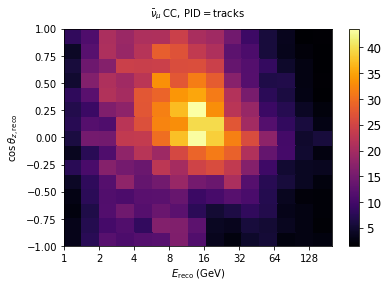

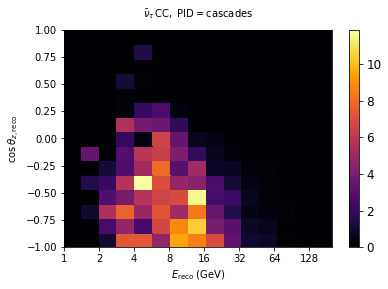

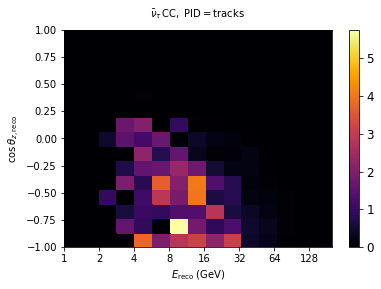

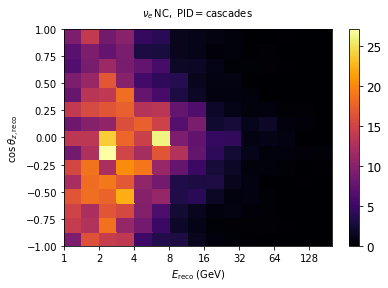

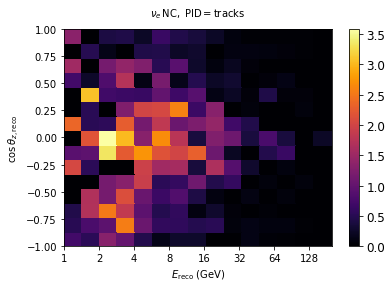

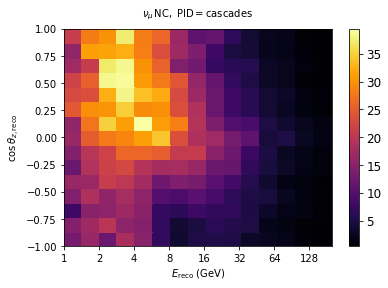

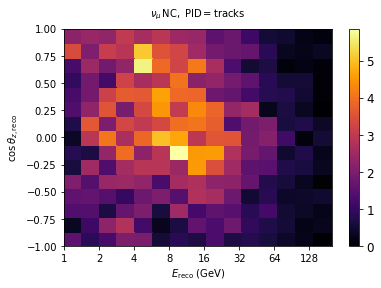

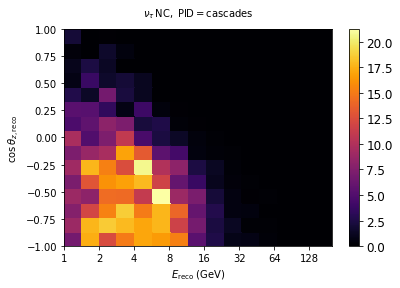

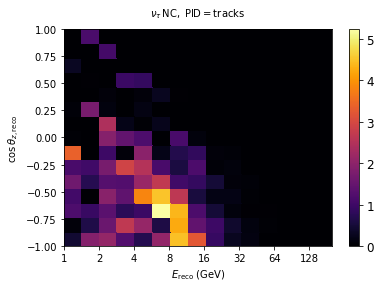

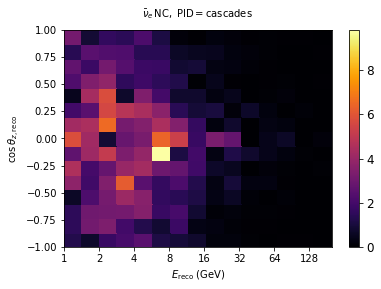

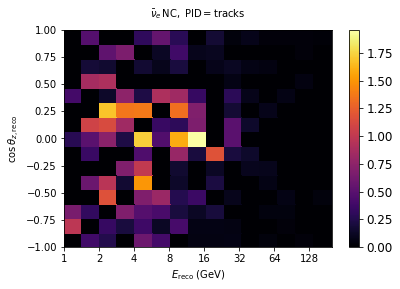

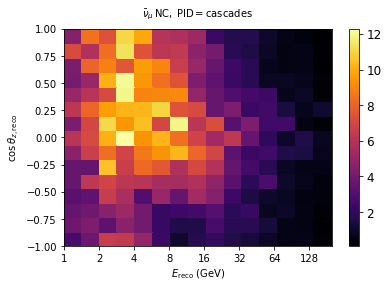

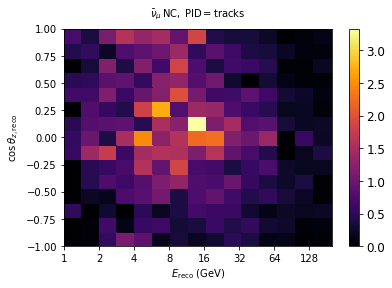

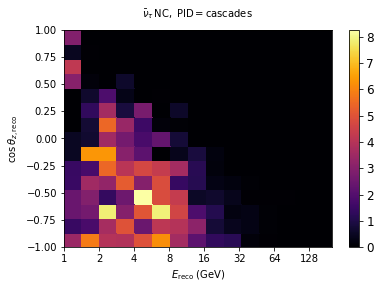

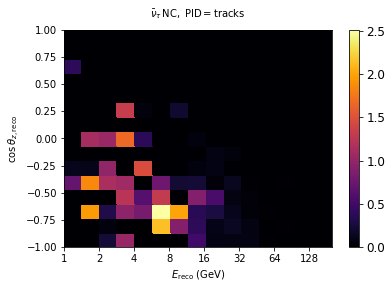

In [19]:
for flav_map in asimov_truth_split[0]:
    for pidmap in flav_map.split('pid'):
        pidmap.plot()

In [4]:
asimov_truth = dist_maker.get_outputs(return_sum=True)

[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.6670 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] Linking containers ['nue_cc', 'numu_cc', 'nutau_cc', 'nue_nc', 'numu_nc', 'nutau_nc', 'nuebar_cc', 'numubar_cc', 'nutaubar_cc', 'nuebar_nc', 'numubar_nc', 'nutaubar_nc'] into nu
[    INFO] Calculating nominal nue flux for nu
[    INFO] Calculating nominal numu flux for nu
[    INFO] Calculating nominal nuebar flux for nu
[    INFO] Calculating nominal numubar flux for nu
[   DEBUG] Unlinking all containers
[   DEBUG] module pisa.stages.flux.pi_honda_ip, function compute_function: 3485.9459 ms
[   DEBUG] Transforming nominal_nu_flux binned to array data
[   DEBUG] Transforming nominal_nubar_flux binned to array data
[   DEBUG] Transforming nominal_nu_flux binned to array data
[   DEBUG] Transforming nom

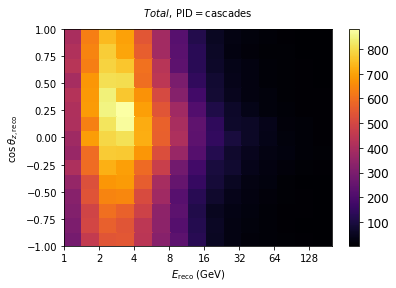

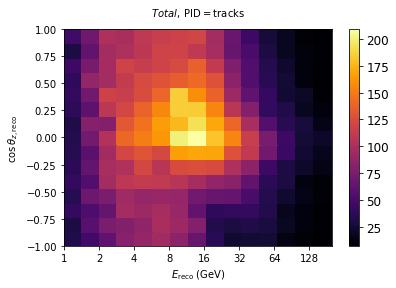

In [5]:
truth_dist = asimov_truth[0]
for pidmap in truth_dist.split('pid'):
    pidmap.plot()

## fitting nuisiance parameters at one point

In [6]:
from pisa.analysis.analysis import Analysis
analysis = Analysis()

In [7]:
print(dist_maker.params.free.names)

(u'nue_numu_ratio', u'Barr_uphor_ratio', u'Barr_nu_nubar_ratio', u'delta_index', u'theta23', u'deltam31', u'Genie_Ma_QE', u'Genie_Ma_RES', u'aeff_scale', u'nu_nc_norm')


In [8]:
minimizer_settings = { 
    "method":{
        "value":"slsqp",
        "desc":"no desc"
    },
    "options":{
        "value":{
            "maxiter":100,
            "ftol":1.e-5,
            "eps":1.e-4
        },
        "desc":{
            "maxiter":"Max iteration",
            "ftol":"Precision goal for the value of f in the stopping criterion",
            "eps":"Step size used for numerical approximation of the jacobian"}
    }
}

In [9]:
fit_result = analysis.fit_hypo(asimov_truth,
                               dist_maker,
                               hypo_param_selections=['nh'],
                               metric='llh',
                               check_octant=True,
                               fit_octants_separately=True,
                               minimizer_settings=minimizer_settings,
                              )

[ WARNING] Minimizer slsqp requires artificial boundaries SMALLER than the user-specified boundaries (so that numerical gradients do not exceed the user-specified boundaries).
[   DEBUG] Running the slsqp minimizer...
                                                                                        (deg)       (eV**2)                                                       
 iter   funcalls      llh      | nue_numu_rat Barr_uphor_r Barr_nu_nuba delta_index    theta23      deltam31   Genie_Ma_QE  Genie_Ma_RES  aeff_scale   nu_nc_norm 
------ ---------- ------------ + ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------
[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 2.3499 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> W

[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   

  0        1       0.00000e+00 |  1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  4.97000e+01  2.52500e-03  0.00000e+00  0.00000e+00  1.00000e+00  1.00000e+00[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.1518 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> Working on stage "flux" service "pi_simple"
[   DEBUG] module pisa.stages.flux.pi_simple, function compute_function: 258.9760 ms
[   DEBUG] >> Working on stage "osc" service "pi_globes"
[   DEBUG] >> Working on stage "xsec" service "genie_sys"
[   DEBUG] module pisa.stages.xsec.genie_sys, function apply_function: 2.9380 ms
[   DEBUG] >> Working on stage "aeff" service "pi_aeff"
[   DEBUG] module pisa.stages.aeff.pi_aeff, function apply_function: 2.5959 ms
[   DEBUG] >> Working on stage "utils" service "pi_hist"
[   DEBUG] Transforming weigh

  0        3      -2.02856e-07 |  1.00000e+00  6.00000e-04  0.00000e+00  0.00000e+00  4.97000e+01  2.52500e-03  0.00000e+00  0.00000e+00  1.00000e+00  1.00000e+00[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.1740 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> Working on stage "flux" service "pi_simple"
[   DEBUG] module pisa.stages.flux.pi_simple, function compute_function: 258.3220 ms
[   DEBUG] >> Working on stage "osc" service "pi_globes"
[   DEBUG] >> Working on stage "xsec" service "genie_sys"
[   DEBUG] module pisa.stages.xsec.genie_sys, function apply_function: 4.6918 ms
[   DEBUG] >> Working on stage "aeff" service "pi_aeff"
[   DEBUG] module pisa.stages.aeff.pi_aeff, function apply_function: 3.5849 ms
[   DEBUG] >> Working on stage "utils" service "pi_hist"
[   DEBUG] Transforming weigh

  0        5      -1.19895e-03 |  1.00000e+00  0.00000e+00  0.00000e+00  1.00000e-04  4.97000e+01  2.52500e-03  0.00000e+00  0.00000e+00  1.00000e+00  1.00000e+00[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.1480 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> Working on stage "flux" service "pi_simple"
[   DEBUG] module pisa.stages.flux.pi_simple, function compute_function: 256.7420 ms
[   DEBUG] >> Working on stage "osc" service "pi_globes"
[   DEBUG] Timer unit: 1e-06 s
[   DEBUG] Total time: 201.426 s
[   DEBUG] File: /afs/ifh.de/group/amanda/scratch/trettin/pisa/pisa/stages/osc/pi_globes.py
[   DEBUG] Function: compute_function at line 234
[   DEBUG] Line #      Hits         Time  Per Hit   % Time  Line Contents
[   DEBUG] ==============================================================
[   DE

[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] >> Working on stage "xsec" service "genie_sys"
[   DEBUG] module pisa.stages.xsec.genie_sys, function apply_function: 3.5119 ms
[   DEBUG] >> Working on stage "aeff" service "pi_aeff"
[   DEBUG] module pisa.stages.aeff.pi_aeff, function apply_function: 1.5180 ms
[   DEBUG] >> Working on stage "utils" service "pi_hist"
[   DEBUG] Transforming weights array to binned data
[   DEBUG] Transforming weights_squared array to binned data
[   DEBUG] Transforming weights array to binned data
[   DEBUG] Transforming weights_squared array to binned 

[   DEBUG]    258        48        172.0      3.6      0.0              if '_cc' in container.name:
[   DEBUG]    259     48984      62550.0      1.3      0.0                  for i in range(container.size):
[   DEBUG]    260     48960     750960.0     15.3      0.3                      prob_e, prob_mu = self.calc_prob_e_mu(container['flav'],
[   DEBUG]    261     48960     581115.0     11.9      0.2                                                            container['nubar'],
[   DEBUG]    262     48960   14151872.0    289.0      5.2                                                            container['true_energy'][i],
[   DEBUG]    263     48960   27156873.0    554.7     10.0                                                            container['densities'][i],
[   DEBUG]    264     48960   55704849.0   1137.8     20.6                                                            container['distances'][i]
[   DEBUG]    265                                                                

  0        7      -1.00004e-04 |  1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  4.97000e+01  2.52560e-03  0.00000e+00  0.00000e+00  1.00000e+00  1.00000e+00[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.6062 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> Working on stage "flux" service "pi_simple"
[   DEBUG] >> Working on stage "osc" service "pi_globes"
[   DEBUG] Timer unit: 1e-06 s
[   DEBUG] Total time: 338.509 s
[   DEBUG] File: /afs/ifh.de/group/amanda/scratch/trettin/pisa/pisa/stages/osc/pi_globes.py
[   DEBUG] Function: compute_function at line 234
[   DEBUG] Line #      Hits         Time  Per Hit   % Time  Line Contents
[   DEBUG] ==============================================================
[   DEBUG]    234                                               @line_profile
[   DEBUG]   

[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] Transforming prob_e binned to array data
[   DEBUG] Transforming prob_mu binned to array data
[   DEBUG] Transforming prob_nonsterile binned to array data
[   DEBUG] >> Working on stage "xsec" service "genie_sys"
[   DEBUG] module pisa.stages.xsec.genie_sys, function apply_function: 3.5169 ms
[   DEBUG] >> Working on stage "aeff" service "pi_aeff"
[   DEBUG] module pisa.stages.aeff.pi_aeff, function apply_function: 1.5461 ms
[   DEBUG] >> Working on stage "utils" service "pi_hist"
[   DEBUG] Transforming weights array to binned data
[   DEBUG] Transforming weights_squared array to binned data
[   DEBUG] Transforming weights array to binned data
[   DEBUG] Transforming weights_squared array to binned data
[   DEBUG] Transforming weights array to binned data
[   DEBUG] Transforming weights_squared array to binned 

  0        9      -5.52995e-05 |  1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  4.97000e+01  2.52500e-03  0.00000e+00  6.00000e-04  1.00000e+00  1.00000e+00[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.1461 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> Working on stage "flux" service "pi_simple"
[   DEBUG] >> Working on stage "osc" service "pi_globes"
[   DEBUG] >> Working on stage "xsec" service "genie_sys"
[   DEBUG] module pisa.stages.xsec.genie_sys, function apply_function: 2.9571 ms
[   DEBUG] >> Working on stage "aeff" service "pi_aeff"
[   DEBUG] module pisa.stages.aeff.pi_aeff, function apply_function: 2.5539 ms
[   DEBUG] >> Working on stage "utils" service "pi_hist"
[   DEBUG] Transforming weights array to binned data
[   DEBUG] Transforming weights_squared array to binned data


  0        11     -4.93580e-06 |  1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  4.97000e+01  2.52500e-03  0.00000e+00  0.00000e+00  1.00000e+00  1.00010e+00[   DEBUG] >> Working on stage "data" service "simple_data_loader"
[   DEBUG] module pisa.stages.data.simple_data_loader, function apply_function: 1.1590 ms
[   DEBUG] >> Working on stage "reco" service "simple_param"
[   DEBUG] >> Working on stage "flux" service "pi_honda_ip"
[   DEBUG] >> Working on stage "flux" service "pi_simple"
[   DEBUG] module pisa.stages.flux.pi_simple, function compute_function: 286.2911 ms
[   DEBUG] >> Working on stage "osc" service "pi_globes"
[   DEBUG] Timer unit: 1e-06 s
[   DEBUG] Total time: 373.001 s
[   DEBUG] File: /afs/ifh.de/group/amanda/scratch/trettin/pisa/pisa/stages/osc/pi_globes.py
[   DEBUG] Function: compute_function at line 234
[   DEBUG] Line #      Hits         Time  Per Hit   % Time  Line Contents
[   DEBUG] ==============================================================
[   DE

ValueError: Objective function must return a scalar

In [9]:
theta23_test = [0.1]*ureg.radian
deltam31_test = [0.001]*ureg.eV**2

start_time = datetime.datetime.now()

result = analysis.scan(asimov_truth,
                       dist_maker,
                       hypo_param_selections=['nh'],
                       metric='llh',
                       param_names=['theta23', 'deltam31'],
                       values=[theta23_test, deltam31_test],
                       outer=False,
                       profile=True,
                       check_octant=True,
                       fit_octants_separately=True,
                       minimizer_settings=minimizer_settings,
                       outfile='scan_point_rad.pkl'
                      )

end_time = datetime.datetime.now()
print "\nFit finished! Took %s" % (end_time-start_time)

[    INFO] Working on point theta23 = 0.10 deltam31 = 0.00 
[    INFO] Starting optimization since `profile` requested.
[ WARNING] Minimizer slsqp requires artificial boundaries SMALLER than the user-specified boundaries (so that numerical gradients do not exceed the user-specified boundaries).
                                                                                                                                        
 iter   funcalls    mod_chi2   | nue_numu_rat Barr_uphor_r Barr_nu_nuba delta_index  Genie_Ma_QE  Genie_Ma_RES  aeff_scale   nu_nc_norm 
------ ---------- ------------ + ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------
  12      140      7.93337e+02 |  1.17190e+00 -5.44057e-01  2.38751e-01  5.77779e-02  1.24657e+00  7.09362e-01  8.67395e-01  1.09290e+00[   ERROR] Error occurred computing outputs in stage flux / service pi_simple ...


KeyboardInterrupt: 

In [104]:
theta24_test = [0.1]*ureg.radian
theta34_test = [0.0]*ureg.radian

start_time = datetime.datetime.now()

result = analysis.scan(asimov_truth,
                       dist_maker,
                       hypo_param_selections=['nh'],
                       metric='mod_chi2',
                       param_names=['theta24', 'theta34'],
                       values=[theta24_test, theta34_test],
                       outer=False,
                       profile=True,
                       check_octant=True,
                       fit_octants_separately=True,
                       minimizer_settings=minimizer_settings,
                       outfile='scan_point_rad.pkl'
                      )

end_time = datetime.datetime.now()
print "\nFit finished! Took %s" % (end_time-start_time)

[    INFO] Working on point theta24 = 0.10 theta34 = 0.00 
[    INFO] Starting optimization since `profile` requested.
[ WARNING] Minimizer slsqp requires artificial boundaries SMALLER than the user-specified boundaries (so that numerical gradients do not exceed the user-specified boundaries).
                                                                                        (deg)       (eV**2)                                                       
 iter   funcalls    mod_chi2   | nue_numu_rat Barr_uphor_r Barr_nu_nuba delta_index    theta23      deltam31   Genie_Ma_QE  Genie_Ma_RES  aeff_scale   nu_nc_norm 
------ ---------- ------------ + ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------
[    INFO] Calculating nominal nue flux for nu
[    INFO] Calculating nominal numu flux for nu
[    INFO] Calculating nominal nuebar flux for nu
[    INFO] Calculating nominal numubar flux for nu
[   ERROR] Error occ

ValueError: Objective function must return a scalar

## Writing dictionary with settings for each Job

### standard oscillations

973
230.1324503311258
[ WARNING] /cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/axes/_base.py:1292: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':

[ WARNING] /cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/axes/_base.py:1297: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):

450
450


[0.3, 0.7, 0.0019, 0.0033]

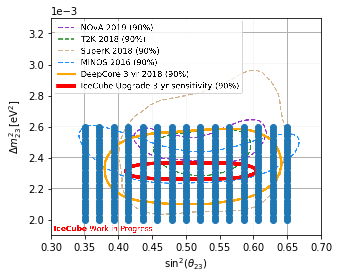

In [7]:
from scipy.misc import imread
im = imread("plots/Upgrade_NuMu_Disappearance_Sensitivity_cropped.png")

xmin, xmax, ymin, ymax = (0.3, 0.7, 1.9e-3, 3.3e-3)
print im.shape[0]
aspect = np.true_divide(im.shape[0], im.shape[1]) * (xmax - xmin)/(ymax - ymin)
print aspect
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)

dmsq_12 = 7.39e-5
sinsq_th23 = np.linspace(0.35, 0.65, 15)
th23_list = np.arcsin(np.sqrt(sinsq_th23))
dmsq_31 = np.linspace(2.0, 2.6, 30)*1e-3 + dmsq_12
dmsq31_list = dmsq_31
th23_map =  np.repeat(th23_list, len(dmsq31_list) )
dmsq31_map =  np.array(dmsq31_list.tolist()*len(th23_list))
# print th23_map
# print dmsq31_map
print len(th23_map)
print len(dmsq31_map)
plt.scatter(np.sin(th23_map)**2, dmsq31_map - dmsq_12)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# plt.grid()
plt.xlabel(r'$\sin^2(\theta_{23})$')
plt.ylabel(r'$\Delta m_{23}^2\,[\mathrm{eV}^2]$')
plt.axis([xmin, xmax, ymin, ymax])

In [10]:
import pickle
scan_config = {}
scan_config['theta23_map'] = th23_map
scan_config['deltam31_map'] = dmsq31_map
scan_config['fit_kwargs'] = dict(hypo_param_selections=['nh'],
                                 metric='llh',
                                 check_octant=True,
                                 fit_octants_separately=True,
                                 minimizer_settings=minimizer_settings)
scan_config['pipeline'] = './pipeline_upgrade_neutrinos_std_osc_dragon.cfg'
with open('scan_config_farm_std_osc_dragon_llh.pkl', 'wb') as f:
    pickle.dump(scan_config, f)
theta23_test = [scan_config['theta23_map'][0]]*ureg.radian
deltam31_test = [scan_config['deltam31_map'][0]]*ureg.eV**2
print 'at point: theta23 %.4f (deg), deltam31 %.4f (eV**2)' % (theta23_test[0].m_as('degree'), deltam31_test[0].m_as('eV**2'))

at point: theta23 36.2712 (deg), deltam31 0.0021 (eV**2)


### sterile oscillations

In [9]:
sin_sq_43_i = 0.00
sin_sq_43_f = 0.3
sin_sq_43_prec = 0.02
theta_42_list = np.arcsin(np.sqrt(10.0**np.arange(-3.2, -0.5, 0.15) ))
theta_42_list = np.append(np.array([0.0]), theta_42_list )
theta_43_list = np.arcsin(np.sqrt(np.arange(sin_sq_43_i, sin_sq_43_f, sin_sq_43_prec) ) )
dm41_val = 1.0
dm41_list = dm41_val*np.ones(1)
print "Theta 24:" , theta_42_list
print "Theta 34:" , theta_43_list
print "DM41 : "   , dm41_list
theta_42_map =  np.repeat(theta_42_list, len(theta_43_list) )
theta_43_map =  np.array(theta_43_list.tolist()*len(theta_42_list))

Theta 24: [0.         0.02512151 0.02985826 0.03548879 0.04218216 0.05013973
 0.0596015  0.07085385 0.08423911 0.10016742 0.11913182 0.14172775
 0.16867916 0.20087441 0.23941811 0.28570953 0.34156855 0.40945253
 0.49286434 0.59721451]
Theta 34: [0.         0.14189705 0.20135792 0.24746706 0.28675655 0.32175055
 0.35374161 0.383497   0.41151685 0.43814903 0.46364761 0.48820526
 0.51197269 0.53507081 0.55759883]
DM41 :  [1.]


In [10]:
print len(theta_42_map)

300


In [11]:
import pickle
scan_config = {}
scan_config['theta_42_map'] = theta_42_map
scan_config['theta_43_map'] = theta_43_map
scan_config['dm41'] = dm41_val
scan_config['fit_kwargs'] = dict(hypo_param_selections=['nh'],
                                 metric='llh',
                                 check_octant=True,
                                 fit_octants_separately=True,
                                 minimizer_settings=minimizer_settings)
scan_config['pipeline'] = './pipeline_upgrade_neutrinos_sterile_globes.cfg'
with open('scan_config_farm_null.pkl', 'wb') as f:
    pickle.dump(scan_config, f)

In [7]:
import pickle
with open('scan_config_farm_null.pkl', 'rb') as f:
    scan_config_reco = pickle.load(f)


In [11]:
print scan_config_reco['fit_kwargs']

{'minimizer_settings': {'method': {'value': 'slsqp', 'desc': 'no desc'}, 'options': {'value': {'maxiter': 100, 'eps': 0.0001, 'ftol': 1e-05}, 'desc': {'maxiter': 'Max iteration', 'eps': 'Step size used for numerical approximation of the jacobian', 'ftol': 'Precision goal for the value of f in the stopping criterion'}}}, 'check_octant': True, 'fit_octants_separately': True, 'metric': 'llh', 'hypo_param_selections': ['nh']}


In [78]:
with open('test_output_1.pkl', 'rb') as f:
    test_result = pickle.load(f)
print test_result.keys()

['steps', 'results']


In [81]:
fitres = test_result['results'][0]

In [110]:
print fitres.keys()

['metric', 'metric_val', 'params', 'detailed_metric_info', 'minimizer_time', 'num_distributions_generated', 'minimizer_metadata']


In [115]:
print test_result['steps']

{'theta24': [<Quantity(0.0, 'radian')>], 'theta34': [<Quantity(0.141897054604, 'radian')>]}


In [128]:
print fitres['metric_val']
print fitres['params']['theta34']['value'].m_as('radian')
#print fitres['params']['theta24']

0.0687501319909
0.1418970546041639


## recovering fits

### standard oscillations

In [22]:
dmsq_12 = 7.39e-5
th23_scan = []
deltam32_scan = []
chi2_scan = []
for i in range(450):
    fname = 'fit_results/std_osc_dragon_llh_%d.pkl' % i
#     with open(fname, 'rb') as f:
#         result_content = pickle.load(f)
#         result = result_content['results'][0]
#         th23_scan.append(result['params']['theta23']['value'].m_as('radian'))
#         deltam32_scan.append(result['params']['deltam31']['value'].m_as('eV**2')-dmsq_12)
#         chi2_scan.append(result['metric_val'])
    try:
        with open(fname, 'rb') as f:
            result_content = pickle.load(f)
            result = result_content['results'][0]
            th23_scan.append(result['params']['theta23']['value'].m_as('radian'))
            deltam32_scan.append(result['params']['deltam31']['value'].m_as('eV**2')-dmsq_12)
            chi2_scan.append(result['metric_val'])
    except:
        print 'could not read index %d' % i
th23_scan = np.array(th23_scan)
deltam32_scan = np.array(deltam32_scan)
chi2_scan = np.array(chi2_scan)

(array([ 3.,  4., 19., 24., 35., 54., 67., 68., 77., 99.]),
 array([-7.96005732e+01, -7.16414580e+01, -6.36823429e+01, -5.57232277e+01,
        -4.77641126e+01, -3.98049974e+01, -3.18458823e+01, -2.38867672e+01,
        -1.59276520e+01, -7.96853688e+00, -9.42174238e-03]),
 <a list of 10 Patch objects>)

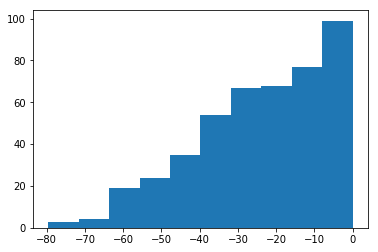

In [23]:
plt.hist(chi2_scan)

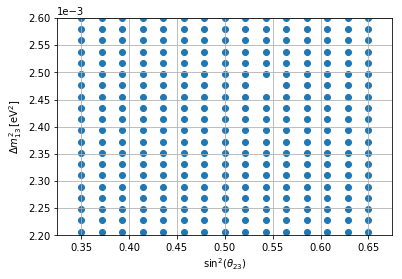

In [81]:
plt.scatter(np.sin(th23_scan)**2, deltam32_scan)
plt.ylim((2.2e-3, 2.6e-3))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid()
plt.xlabel(r'$\sin^2(\theta_{23})$')
plt.ylabel(r'$\Delta m_{13}^2\,[\mathrm{eV}^2]$')

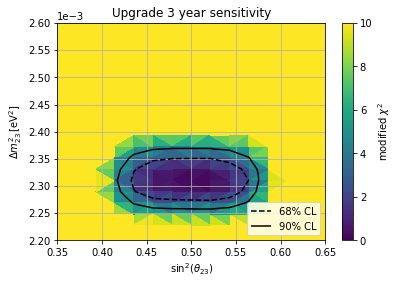

In [24]:
llh_scan = chi2_scan
chi2_scan = -2*llh_scan
tc = plt.tripcolor(np.sin(th23_scan)**2, deltam32_scan, chi2_scan, vmin=0, vmax=10)
cb = plt.colorbar(tc)
cb.set_label(r'modified $\chi^2$')
level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
tcf = plt.tricontour(np.sin(th23_scan)**2, deltam32_scan, chi2_scan,
                     levels=[level_68, level_90],
                     colors=['k', 'k'],
                     linestyles=['dashed', 'solid'],
                    )
labels = ['68% CL', '90% CL']
for i in range(len(labels)):
    tcf.collections[i].set_label(labels[i])
# plt.colorbar()
# plt.scatter(umu4sq, utau4sq, alpha=0.3)
plt.ylim((2.2e-3, 2.6e-3))
plt.legend(loc='lower right')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid()
plt.xlabel(r'$\sin^2(\theta_{23})$')
plt.ylabel(r'$\Delta m_{23}^2\,[\mathrm{eV}^2]$')
plt.title('Upgrade 3 year sensitivity')
# plt.savefig('plots/std_osc_dragon.pdf')

In [91]:
np.rad2deg(np.arcsin(np.sqrt(0.51)))

45.57299599919429

973
230.1324503311258


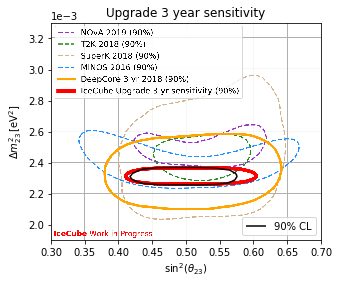

In [25]:
im = imread("plots/Upgrade_NuMu_Disappearance_Sensitivity_cropped.png")

xmin, xmax, ymin, ymax = (0.3, 0.7, 1.9e-3, 3.3e-3)
print im.shape[0]
aspect = np.true_divide(im.shape[0], im.shape[1]) * (xmax - xmin)/(ymax - ymin)
print aspect
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)

level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
tcf = plt.tricontour(np.sin(th23_scan)**2, deltam32_scan, chi2_scan,
                     levels=[level_90], #, level_90],
                     colors=['k'], #, 'k'],
                     linestyles=['solid'],
                    )
labels = ['90% CL']
for i in range(len(labels)):
    tcf.collections[i].set_label(labels[i])

plt.legend(loc='lower right')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel(r'$\sin^2(\theta_{23})$')
plt.ylabel(r'$\Delta m_{23}^2\,[\mathrm{eV}^2]$')
plt.axis([xmin, xmax, ymin, ymax])
plt.title('Upgrade 3 year sensitivity')
plt.savefig('plots/std_osc_dragon_overlay.png', dpi=300)

### sterile oscillations

In [10]:
import pickle
theta_42_scan = []
theta_43_scan = []
chi2_scan = []
for i in range(300):
    fname = 'fit_results/null_scan/null_scan_%d.pkl' % i
    # try:
    with open(fname, 'rb') as f:
        result_content = pickle.load(f)
        result = result_content['results'][0]
        theta_42_scan.append(result['params']['theta24']['value'].m_as('radian'))
        theta_43_scan.append(result['params']['theta34']['value'].m_as('radian'))
        chi2_scan.append(result['metric_val'])
    # except:
    #     print 'could not read index %d' % i
theta_42_scan = np.array(theta_42_scan)
theta_43_scan = np.array(theta_43_scan)
chi2_scan = np.array(chi2_scan)
chi2_scan = -2*chi2_scan

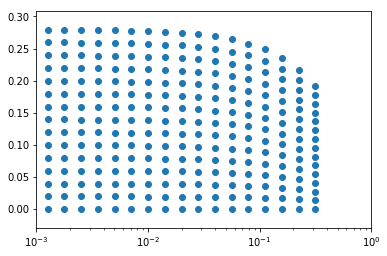

In [11]:
umu4sq = np.sin(theta_42_scan)**2
utau4sq = np.cos(theta_42_scan)**2*np.sin(theta_43_scan)**2
plt.scatter(umu4sq, utau4sq)
plt.xlim((1e-3, 1))
plt.gca().set_xscale('log')

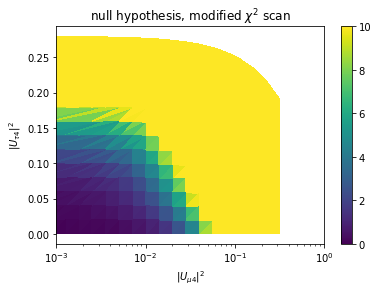

In [12]:
from matplotlib.colors import LogNorm
plt.tripcolor(umu4sq, utau4sq, chi2_scan, vmin=0, vmax=10)
plt.xlim((1e-3, 1))
plt.gca().set_xscale('log')
plt.colorbar()
# plt.scatter(umu4sq, utau4sq, alpha=0.3)
plt.xlabel(r'$|U_{\mu 4}|^2$')
plt.ylabel(r'$|U_{\tau 4}|^2$')
plt.title(r'null hypothesis, modified $\chi^2$ scan')
# plt.savefig('null_hypo_notfailed_linear.pdf')

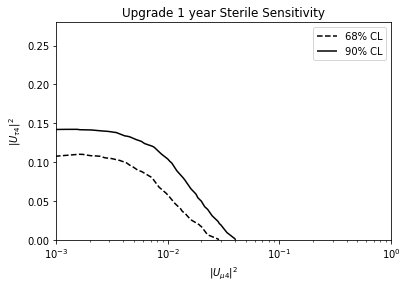

In [17]:
# plt.tricontour(umu4sq, utau4sq, chi2_scan, levels=[4.61])
level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
tcf = plt.tricontour(umu4sq, utau4sq, chi2_scan,
                     levels=[level_68, level_90],
                     colors=['k', 'k'],
                     linestyles=['dashed', 'solid'],
                    )
labels = ['68% CL', '90% CL']
for i in range(len(labels)):
    tcf.collections[i].set_label(labels[i])
plt.xlim((1e-3, 1))
plt.gca().set_xscale('log')
plt.legend()
# plt.scatter(umu4sq, utau4sq, alpha=0.3)
plt.xlabel(r'$|U_{\mu 4}|^2$')
plt.ylabel(r'$|U_{\tau 4}|^2$')
plt.title('Upgrade 1 year Sterile Sensitivity')
plt.savefig('null_hypo_contour_one_year_no_det_syst.pdf')

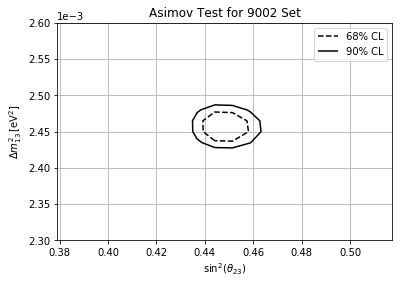

In [40]:
asimov_delta_chi2_hist = np.array(asimov_delta_chi2s).reshape(20, 21)
X, Y = np.meshgrid(xvals, deltam31_test)
level_68 = stats.chi2.ppf(0.68, df=2)
level_90 = stats.chi2.ppf(0.90, df=2)
CS = plt.contour(X, Y, asimov_delta_chi2_hist.T,
            levels=[level_68, level_90],
            colors=['k', 'k'],
            linestyles=['dashed', 'solid']
           )

labels = ['68% CL', '90% CL']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid()
plt.xlabel(r'$\sin^2(\theta_{23})$')
plt.ylabel(r'$\Delta m_{13}^2\,[\mathrm{eV}^2]$')
plt.legend()
plt.title('Asimov Test for 9002 Set')
plt.show()